In [23]:
import pandas as pd
import numpy as np

#from IPython.core.display import HTML

# COVID-19 data

Total

In [24]:
world_ts = pd.read_csv('output_data/time_series/ts_world_covid19.csv')
world_ts['Date_Confirmed'] = pd.DatetimeIndex(world_ts['Date_Confirmed'])
world_ts = world_ts[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US']]

In [25]:
mexico_ts = pd.read_csv('output_data/time_series/ts_mexico_covid19.csv')
mexico_ts['Date_Confirmed'] = pd.DatetimeIndex(mexico_ts['Date_Confirmed'])
mexico_ts['Mexico'] = mexico_ts.sum(axis=1) # Sum rows for Mexico total

In [26]:
mexico_ts.keys()

Index(['Date_Confirmed', 'AGUASCALIENTES', 'BAJA CALIFORNIA',
       'BAJA CALIFORNIA\nSUR', 'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS',
       'CHIHUAHUA', 'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA',
       'DISTRITO FEDERAL', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO',
       'JALISCO', 'MEXICO', 'MICHOACAN', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEON', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSI', 'SAN LUIS POTOSÍ', 'SINALOA',
       'SONORA', 'TABASCO', 'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATAN',
       'YUCATÁN', 'ZACATECAS', 'Mexico'],
      dtype='object')

Daily

In [27]:
world_delta = pd.read_csv('output_data/time_series/delta_world_covid19.csv')
world_delta['Date_Confirmed'] = pd.DatetimeIndex(world_delta['Date_Confirmed'])
world_delta = world_delta[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US']]

In [28]:
mexico_delta = pd.read_csv('output_data/time_series/delta_mexico_covid19.csv')
mexico_delta['Date_Confirmed'] = pd.DatetimeIndex(mexico_delta['Date_Confirmed'])
mexico_delta['Mexico'] = mexico_delta.sum(axis=1) # Sum rows for Mexico total

# Tables

In [29]:
import janitor

In [30]:
# Only sensible way to filter data smh
world_ts = world_ts.filter_date('Date_Confirmed','2020-02-25','2020-04-10')
mexico_ts = mexico_ts.filter_date('Date_Confirmed','2020-02-25','2020-04-10')
world_delta = world_delta.filter_date('Date_Confirmed','2020-02-25','2020-04-10')
mexico_delta = mexico_delta.filter_date('Date_Confirmed','2020-02-25','2020-04-10')

In [31]:
ts_totals = world_ts.merge(mexico_ts, on='Date_Confirmed', how='outer')
ts_totals = ts_totals.fillna(method='ffill') # First fill missing time series totals with previous row value
ts_totals = ts_totals.replace(0, np.nan) # Now convert 0 to NaN

In [32]:
ts_daily = world_delta.merge(mexico_delta, on='Date_Confirmed', how='outer')

In [33]:
ts_totals.to_csv('output_data/time_series/totals.csv', index=False)
ts_daily.to_csv('output_data/time_series/daily.csv', index=False)

# Plots

In [34]:
from numpy import *
import math
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


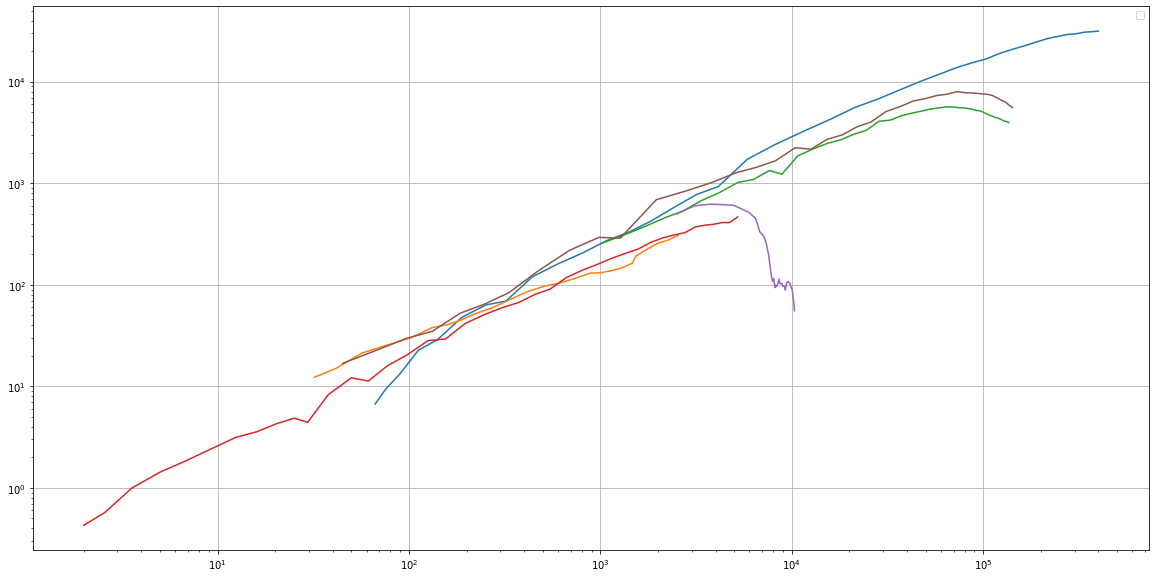

In [38]:
plt.figure(figsize=(20,10))

for region in ['US','Mexico','Italy','United Kingdom','Korea, South','Spain']:
    plt.plot(list(ts_totals[region].rolling(window=7).mean()), list(ts_daily[region].rolling(window=7).mean())) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

plt.show()

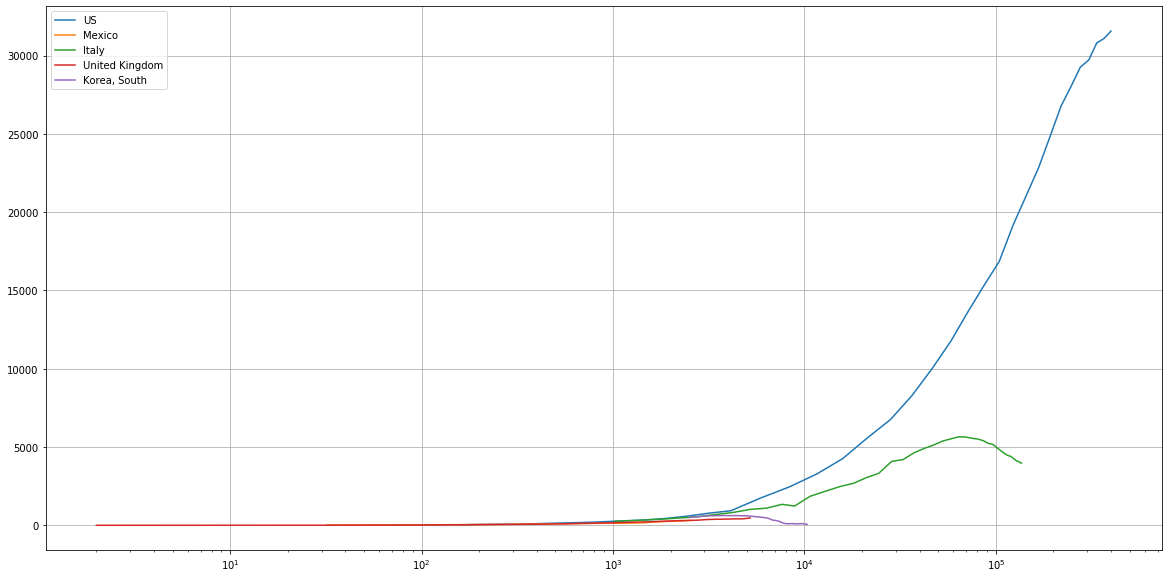

In [13]:
plt.figure(figsize=(20,10))

for region in ['US','Mexico','Italy','United Kingdom','Korea, South']:
    plt.plot(list(ts_totals[region].rolling(window=7).mean()), list(ts_daily[region].rolling(window=7).mean()), label=region) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('log')
plt.grid(True)

plt.show()

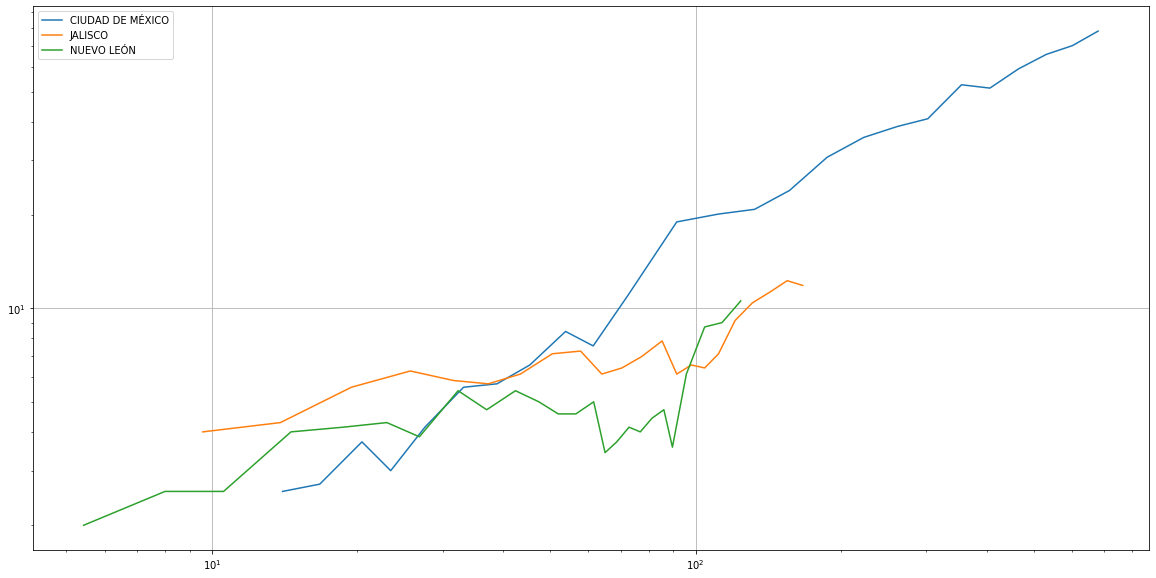

In [39]:
plt.figure(figsize=(20,10))

for state in ['CIUDAD DE MÉXICO','JALISCO','NUEVO LEÓN']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

plt.show()

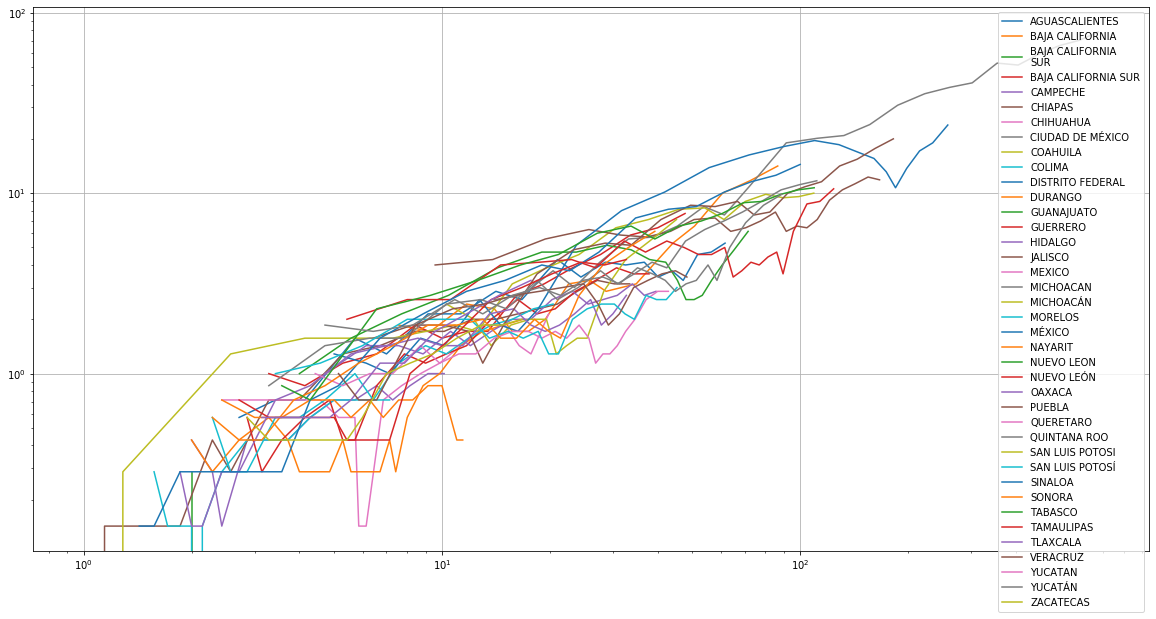

In [17]:
plt.figure(figsize=(20,10))

for state in ['AGUASCALIENTES', 'BAJA CALIFORNIA',
       'BAJA CALIFORNIA\nSUR', 'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS',
       'CHIHUAHUA', 'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA',
       'DISTRITO FEDERAL', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO',
       'JALISCO', 'MEXICO', 'MICHOACAN', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEON', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSI', 'SAN LUIS POTOSÍ', 'SINALOA',
       'SONORA', 'TABASCO', 'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATAN',
       'YUCATÁN', 'ZACATECAS']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

plt.show()

In [19]:
ts_daily

,Date_Confirmed,China,Italy,Spain,United Kingdom,"Korea, South",US,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA\nSUR,...,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,YUCATÁN,ZACATECAS,Mexico
0,2020-02-25,15.0,93.0,4.0,0.0,144.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-26,13.0,131.0,7.0,0.0,284.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-27,13.0,202.0,2.0,0.0,505.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2020-02-28,10.0,233.0,17.0,1.0,571.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2020-02-29,13.0,240.0,13.0,0.0,813.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,2020-03-01,17.0,566.0,39.0,1.0,586.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2020-03-02,6.0,342.0,36.0,1.0,599.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-03,4.0,466.0,45.0,1.0,851.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-04,4.0,587.0,57.0,3.0,435.0,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-05,5.0,769.0,37.0,3.0,467.0,68.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
plt.figure(figsize=(20,10))

for state in ['CIUDAD DE MÉXICO','JALISCO','NUEVO LEÓN']:
    ts_daily.plot(figsize=(15,10))

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

plt.show()

<Figure size 1440x720 with 0 Axes>

ValueError: view limit minimum -36876.25 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units